In [430]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [431]:
Daegu_Buk_gu_cctv = pd.read_csv('./Daegu_Buk_gu.csv', encoding='utf-8')
Daegu_Dalseo_gu_cctv = pd.read_csv('./Daegu_Dalseo_gu.csv', encoding='utf-8')
Daegu_Dalseong_gun_cctv = pd.read_csv('./Daegu_Dalseong_gun.csv', encoding='utf-8')
Daegu_Dong_gu_cctv = pd.read_csv('./Daegu_Dong_gu.csv', encoding='utf-8')
Daegu_Jung_gu_cctv = pd.read_csv('./Daegu_Jung_gu.csv', encoding='utf-8')
Daegu_Nam_gu_cctv = pd.read_csv('./Daegu_Nam_gu.csv', encoding='utf-8')
Daegu_Seo_gu_cctv = pd.read_csv('./Daegu_Seo_gu.csv', encoding='utf-8')
Daegu_Suseong_gu_cctv = pd.read_csv('./Daegu_Suseong_gu.csv', encoding='utf-8')

Daegu_cctv = pd.read_csv('./Daegu.csv', encoding='utf-8')
Daegu_population = pd.read_csv('./Daegu_population.csv', encoding='utf-8')

local_name_list = ['북구','달서구','달성군','동구','중구','남구','서구','수성구']

cctv_list = [
    Daegu_Buk_gu_cctv, Daegu_Dalseo_gu_cctv, Daegu_Dalseong_gun_cctv, 
    Daegu_Dong_gu_cctv, Daegu_Jung_gu_cctv, Daegu_Nam_gu_cctv,
    Daegu_Seo_gu_cctv, Daegu_Suseong_gu_cctv
            ]

In [432]:
cctv_num_list =[]
for num in cctv_list:
    cctv_num_list.append(num['카메라대수'].sum())
cctv_num_list

[1617, 1409, 1048, 1294, 741, 708, 662, 1404]

In [433]:
row_data = {
    '지역': local_name_list,
    '카메라대수': cctv_num_list       
}
local_cctv_num = pd.DataFrame(row_data, columns=['지역','카메라대수'])
local_cctv_num = local_cctv_num.set_index('지역')

In [434]:
list_daegu_cctv_Separation = []

for local_name in local_name_list:
    list_daegu_cctv_Separation.append(Daegu_cctv[Daegu_cctv['소재지지번주소'].str.find(' '+local_name) > 0]['카메라대수'].sum())
list_daegu_cctv_Separation

[32, 64, 20, 64, 41, 22, 28, 36]

In [435]:
cctv_num = local_cctv_num['카메라대수'].values + list_daegu_cctv_Separation
cctv_num

array([1649, 1473, 1068, 1358,  782,  730,  690, 1440], dtype=int64)

In [436]:
local_cctv_num['카메라대수'] = cctv_num

In [437]:
# local_cctv_num
# Daegu_population

In [438]:
Daegu_population['행정구역']=Daegu_population['행정구역'].str.replace('세','')
Daegu_population['행정구역']=Daegu_population['행정구역'].str.replace(' 이상','')

In [439]:
Daegu_population = Daegu_population.applymap(lambda x:str(x).replace(',',''))
Daegu_population = Daegu_population.applymap(lambda x:int(str(x)))

In [440]:
Daegu_population.columns.str.replace(' ','')

Index(['행정구역', '총계', '총계남', '총계여', '중구계', '중구남', '중구여', '동구계', '동구남', '동구여',
       '서구계', '서구남', '서구여', '남구계', '남구남', '남구여', '북구계', '북구남', '북구여', '수성구계',
       '수성구남', '수성구여', '달서구계', '달서구남', '달서구여', '달성군계', '달성군남', '달성군여'],
      dtype='object')

In [441]:
Daegu_population.columns = Daegu_population.columns.str.replace(' ','')

In [442]:
Daegu_population.head()

,행정구역,총계,총계남,총계여,중구계,중구남,중구여,동구계,동구남,동구여,...,북구여,수성구계,수성구남,수성구여,달서구계,달서구남,달서구여,달성군계,달성군남,달성군여
0,0,13085,6754,6331,456,228,228,2019,1021,998,...,1221,1565,839,726,2771,1413,1358,2660,1358,1302
1,1,15384,7854,7530,524,273,251,2401,1235,1166,...,1434,1964,986,978,3370,1780,1590,2885,1429,1456
2,2,17580,9026,8554,588,293,295,2718,1429,1289,...,1682,2387,1217,1170,3836,2028,1808,3138,1579,1559
3,3,19659,10028,9631,625,325,300,2947,1442,1505,...,1848,2839,1501,1338,4480,2313,2167,3362,1701,1661
4,4,20230,10294,9936,628,297,331,3103,1620,1483,...,1858,3069,1536,1533,4710,2388,2322,3260,1641,1619


In [443]:
# local_cctv_num
people_num = Daegu_population.sum()
people_num
man = []
woman = []
people = []

for split in local_name_list:
    for i,local in enumerate(people_num.index):
        if local.find(split)==0:
            if local[-1]=='계':
                people.append(people_num[i])
            elif local[-1]=='남':
                man.append(people_num[i])
            elif local[-1]=='여':
                woman.append(people_num[i])

In [444]:
# local_cctv_num.columns
data = {
    '지역':local_name_list,
    '총인원': people,
    '남': man,
    '여':woman
}
daegu_people = pd.DataFrame(data, columns=['지역','총인원','남','여'])

In [445]:
daegu_people = daegu_people.set_index('지역')
daegu_people

,총인원,남,여
지역,,,
북구,439093,219028,220065
달서구,571303,282756,288547
달성군,254239,129233,125006
동구,348825,172401,176424
중구,77935,37661,40274
남구,148682,71704,76978
서구,179920,90419,89501
수성구,430481,209248,221233


In [446]:
local_cctv_num  #지역별 카메라대수 위에서 구한 값
data_result = pd.merge( local_cctv_num, daegu_people, on='지역' )

In [447]:
data_result

,카메라대수,총인원,남,여
지역,,,,
북구,1649,439093,219028,220065
달서구,1473,571303,282756,288547
달성군,1068,254239,129233,125006
동구,1358,348825,172401,176424
중구,782,77935,37661,40274
남구,730,148682,71704,76978
서구,690,179920,90419,89501
수성구,1440,430481,209248,221233


In [448]:
np.corrcoef( data_result['카메라대수'], data_result['총인원'] )

array([[1.        , 0.90869957],
       [0.90869957, 1.        ]])

In [449]:
data_result.sort_values(by='카메라대수', ascending=False)

,카메라대수,총인원,남,여
지역,,,,
북구,1649,439093,219028,220065
달서구,1473,571303,282756,288547
수성구,1440,430481,209248,221233
동구,1358,348825,172401,176424
달성군,1068,254239,129233,125006
중구,782,77935,37661,40274
남구,730,148682,71704,76978
서구,690,179920,90419,89501


In [454]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin': # 맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('알수없는 시스템 미적용')

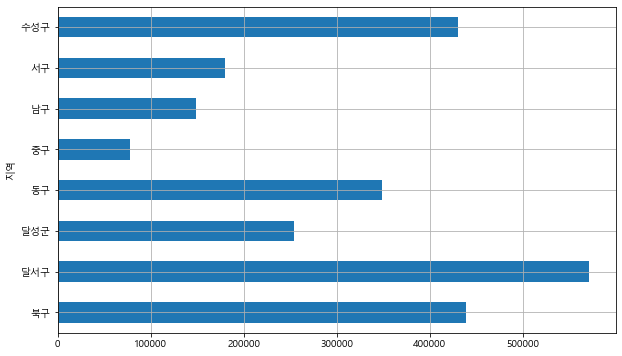

In [456]:
plt.figure(figsize=(10,6))
# 차트 모양 : barh : bar + h(수평선 차트 드로잉)
data_result['총인원'].plot(kind='barh', grid=True)
plt.show()

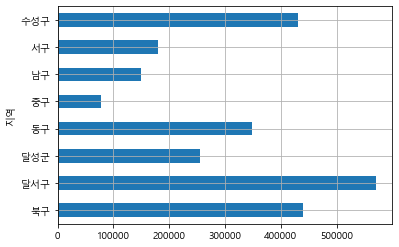

In [452]:
data_result['총인원'].plot(kind='barh', grid=True)